In [1]:
import pandas as pd
import numpy as np

from fredapi import Fred

import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Initial Data for MVP

In [2]:
# Use FRED API to get latest releases in form of Series
fred = Fred(api_key = 'ef21eaa55b4aa6b62a37a05a6ba071c6')

# Series to pull
tens_minus_twos = fred.get_series_latest_release('T10Y2Y') #10 Year Treasury minus 2 Year Treasury Yield
tens_minus_three_month = fred.get_series_latest_release('T10Y3M') #10 Year Treasury minus 3 Month Treasury Yield
recession = fred.get_series_latest_release('USRECD') #Dummy variable for recession based on NBER

In [39]:
fred_data = pd.concat([tens_minus_twos, tens_minus_three_month, recession], axis=1).reset_index()
fred_data.columns = ['Date', '10Y-2Y','10Y-3M','Recession']

In [57]:
fred_data.dropna(inplace = True)
df = fred_data.copy()

In [58]:
df.head(5)

,Date,10Y-2Y,10Y-3M,Recession
46420,1982-01-04,0.32,2.32,1.0
46421,1982-01-05,0.35,2.24,1.0
46422,1982-01-06,0.40,2.43,1.0
46423,1982-01-07,0.30,2.46,1.0
46424,1982-01-08,0.37,2.50,1.0


## EDA

Have to shift yield spreads forward a certain amount of time to see if spreads have any predictive power
into future

Let's start with 6 months, 12 months, and 18 months

In [59]:
#Year has roughly 250 trading days
df['10Y-2Y 6M Forward'] = df.loc[:,'10Y-2Y'].shift(periods=125)
df['10Y-2Y 12M Forward'] = df.loc[:,'10Y-2Y'].shift(periods=250)
df['10Y-2Y 18M Forward'] = df.loc[:,'10Y-2Y'].shift(periods=375)

df['10Y-3M 6M Forward'] = df.loc[:,'10Y-3M'].shift(periods=125)
df['10Y-3M 12M Forward'] = df.loc[:,'10Y-3M'].shift(periods=250)
df['10Y-3M 18M Forward'] = df.loc[:,'10Y-3M'].shift(periods=375)

In [60]:
df.head(5)

,Date,10Y-2Y,10Y-3M,Recession,10Y-2Y 6M Forward,10Y-2Y 12M Forward,10Y-2Y 18M Forward,10Y-3M 6M Forward,10Y-3M 12M Forward,10Y-3M 18M Forward
46420,1982-01-04,0.32,2.32,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46421,1982-01-05,0.35,2.24,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46422,1982-01-06,0.40,2.43,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46423,1982-01-07,0.30,2.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46424,1982-01-08,0.37,2.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# df.dropna(inplace = True)
# df = df.drop(['10Y-2Y', '10Y-3M'], axis=1)

In [62]:
df.head(5)

,Date,10Y-2Y,10Y-3M,Recession,10Y-2Y 6M Forward,10Y-2Y 12M Forward,10Y-2Y 18M Forward,10Y-3M 6M Forward,10Y-3M 12M Forward,10Y-3M 18M Forward
46420,1982-01-04,0.32,2.32,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46421,1982-01-05,0.35,2.24,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46422,1982-01-06,0.40,2.43,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46423,1982-01-07,0.30,2.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46424,1982-01-08,0.37,2.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Quick EDA and time series plots of the spread's predicition ability

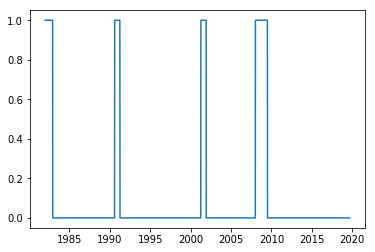

In [63]:
plt.plot(df['Date'], df['Recession']);

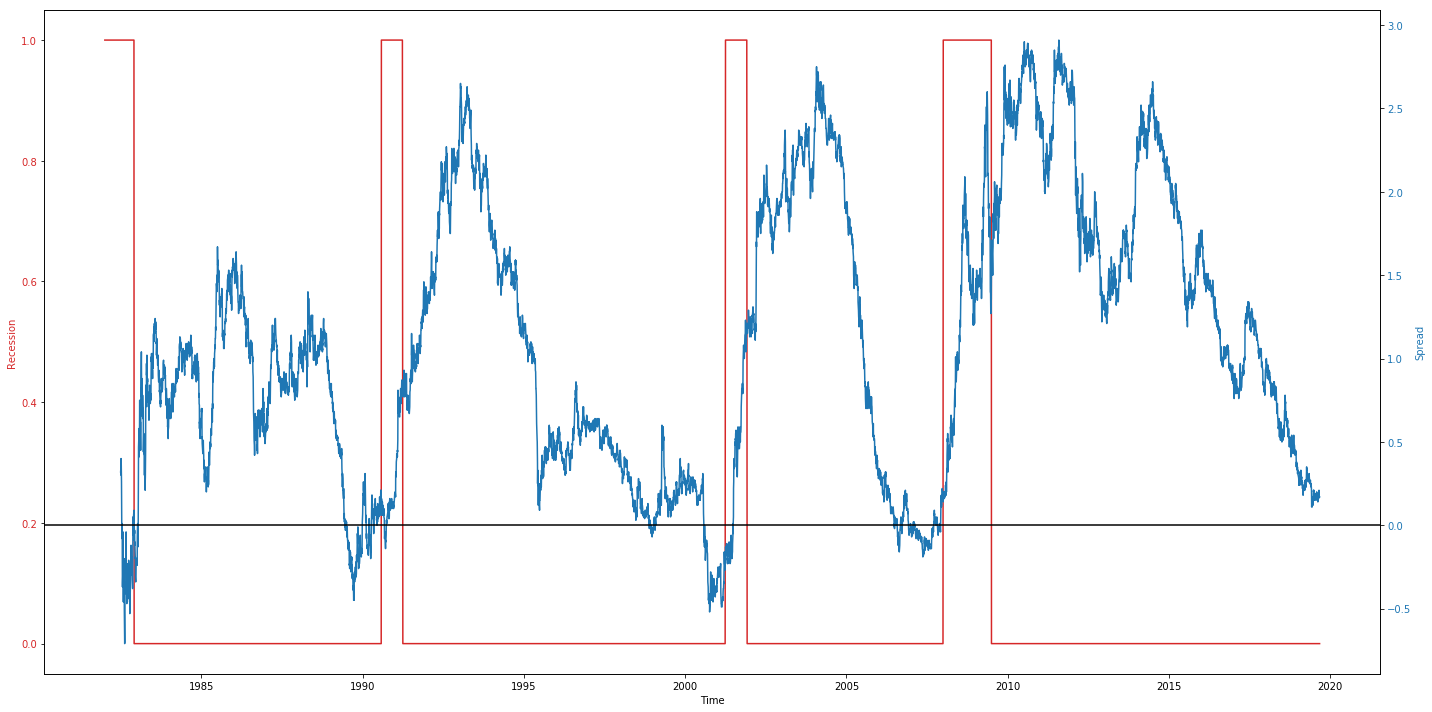

In [64]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Recession', color=color)
ax1.plot(df['Date'], df['Recession'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Spread', color=color)  
ax2.plot(df['Date'], df['10Y-2Y 6M Forward'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.axhline(0, color="black")
plt.show();

Not bad, but seems like indicator is a bit late. Let's try 12 month instead

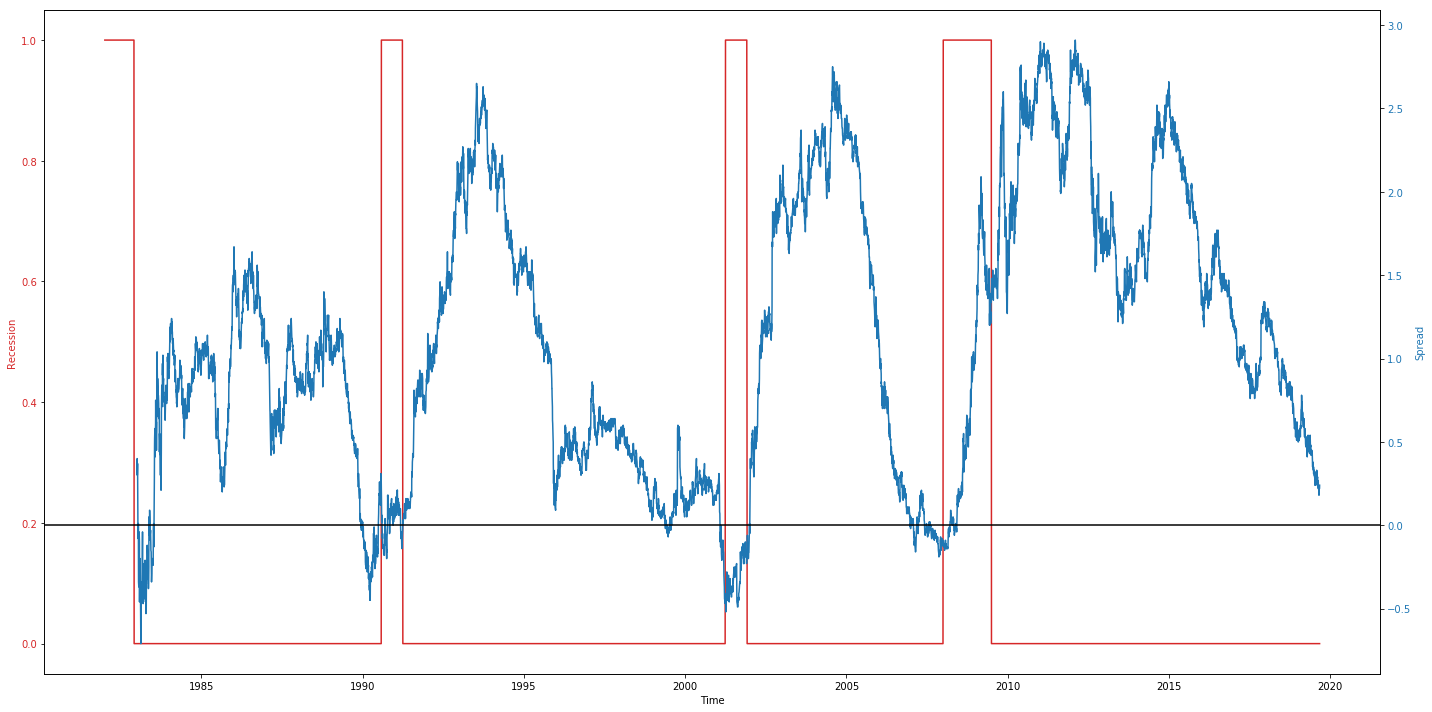

In [65]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Recession', color=color)
ax1.plot(df['Date'], df['Recession'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Spread', color=color)  
ax2.plot(df['Date'], df['10Y-2Y 12M Forward'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.axhline(0, color="black")
plt.show()

And one last time for 18 months

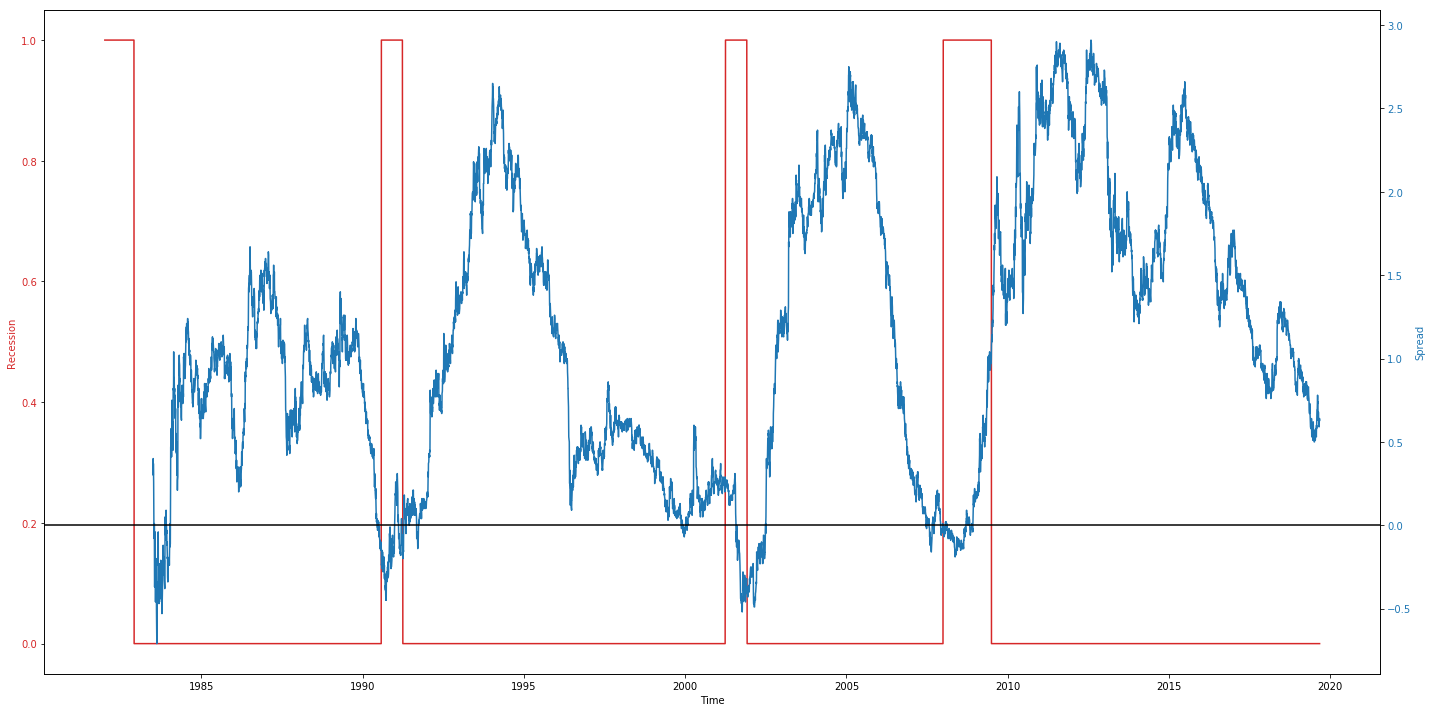

In [66]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Recession', color=color)
ax1.plot(df['Date'], df['Recession'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Spread', color=color)  
ax2.plot(df['Date'], df['10Y-2Y 18M Forward'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.axhline(0, color="black")
plt.show()